In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
doc = pd.read_csv('DS_interview_doc.csv')
doc.head()

,New_ID,date,year_month,byte_size,filetype,school_country,school_name,school_type,enrollment,first_subject_name,tag,page_count,hqd_score,is_mcq,top_keywords,language,course_id_,user_id_
0,880,2017-11-19,2017-11,48940,docx,United States,Fordham University,HIGHER,17901.0,accounting,paper,4.0,0.95683,NaN,1,NaN,0,0
1,881,2016-06-10,2016-06,5336,docx,United States,Rio Salado Community College,HIGHER,6086.0,economics,paper,1.0,0.77776,NaN,0,english,1,1
2,882,2017-03-20,2017-03,18034,docx,United States,University of Phoenix,HIGHER,212044.0,sociology,paper,3.0,0.94462,NaN,1,english,2,2
3,883,2018-01-28,2018-01,16518,docx,Canada,University of Waterloo,HIGHER,36670.0,history,notes,3.0,0.96980,NaN,0,english,3,3
4,884,2017-06-11,2017-06,88860,docx,United States,"University of California, Santa Barbara",HIGHER,25833.0,sociology,notes,4.0,0.96610,NaN,1,english,4,4


In [3]:
# check data type and missing value
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   New_ID              10000 non-null  int64  
 1   date                10000 non-null  object 
 2   year_month          10000 non-null  object 
 3   byte_size           10000 non-null  int64  
 4   filetype            10000 non-null  object 
 5   school_country      10000 non-null  object 
 6   school_name         10000 non-null  object 
 7   school_type         10000 non-null  object 
 8   enrollment          9932 non-null   float64
 9   first_subject_name  10000 non-null  object 
 10  tag                 9999 non-null   object 
 11  page_count          10000 non-null  float64
 12  hqd_score           9789 non-null   float64
 13  is_mcq              415 non-null    float64
 14  top_keywords        10000 non-null  int64  
 15  language            9575 non-null   object 
 16  cours

In [4]:
paid = pd.read_csv('DS_interview_paid_unlock.csv')
paid.head()

,New_ID,unlock_date,unlock_cnt
0,6488,2016-07-25,1
1,6488,2017-05-03,1
2,6488,2017-05-03,1
3,6488,2017-10-28,1
4,6488,2018-01-24,1


In [5]:
# check data type and missing value
paid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38868 entries, 0 to 38867
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   New_ID       38868 non-null  int64 
 1   unlock_date  38868 non-null  object
 2   unlock_cnt   38868 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 911.1+ KB


### Question:

Define the problem - What is the document quality status today based on the datasets? For example, what fraction of the documents are of high quality per current definition?

In [6]:
# convert string to date type
doc['date'] = pd.to_datetime(doc.date)
doc['year_month'] = pd.to_datetime(doc.year_month)
paid['unlock_date'] = pd.to_datetime(paid.unlock_date)

In [9]:
# join doc and paid datasets by New_ID
temp = pd.merge(doc, paid, left_on = 'New_ID', right_on = 'New_ID', how = 'inner')[['New_ID', 'date', 'unlock_date', 'unlock_cnt']]

# calculate the month difference b/w unlock date and upload date
temp['month_diff'] = (temp.unlock_date - temp.date) / np.timedelta64(1, 'M')

# create high quality docs 
high_quality_doc = temp.query('month_diff <= 24').groupby('New_ID').agg({'unlock_cnt': 'sum'}).query('unlock_cnt >= 3').reset_index()
print('The fraction of high quality documents versus total uploaded documents:', len(high_quality_doc)/doc.New_ID.nunique())

The fraction of high quality documents versus total uploaded documents: 0.1612


### Question

Understand the data - Perform any EDA on the data set to derive insights, identify opportunities and etc. 

In [10]:
# select high quality documents
doc['hqd'] = doc.New_ID.isin(high_quality_doc.New_ID)
doc.head()

,New_ID,date,year_month,byte_size,filetype,school_country,school_name,school_type,enrollment,first_subject_name,tag,page_count,hqd_score,is_mcq,top_keywords,language,course_id_,user_id_,hqd
0,880,2017-11-19,2017-11-01,48940,docx,United States,Fordham University,HIGHER,17901.0,accounting,paper,4.0,0.95683,NaN,1,NaN,0,0,False
1,881,2016-06-10,2016-06-01,5336,docx,United States,Rio Salado Community College,HIGHER,6086.0,economics,paper,1.0,0.77776,NaN,0,english,1,1,True
2,882,2017-03-20,2017-03-01,18034,docx,United States,University of Phoenix,HIGHER,212044.0,sociology,paper,3.0,0.94462,NaN,1,english,2,2,True
3,883,2018-01-28,2018-01-01,16518,docx,Canada,University of Waterloo,HIGHER,36670.0,history,notes,3.0,0.96980,NaN,0,english,3,3,False
4,884,2017-06-11,2017-06-01,88860,docx,United States,"University of California, Santa Barbara",HIGHER,25833.0,sociology,notes,4.0,0.96610,NaN,1,english,4,4,True


Plotting the time series of document volume shows the seasonality and trend through 2016-06-01 and 2018-03-01. It clearly shows high utilization occurs during school spring and fall semesters, and lower utilization when school is off. From those 22 months, the upper-forward trend is telling us our business is increasing. One more interesting point is found that the volume of high quality documents in 2017 Spring is significantly greater than others. 

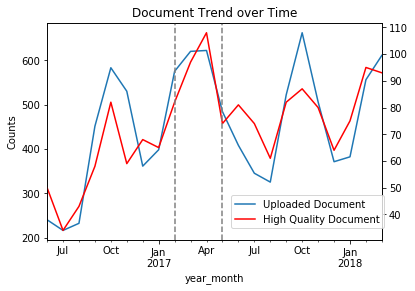

In [68]:
ax = doc.groupby(['year_month']).size().plot(label='Uploaded Document')
plt.ylabel('Counts')
ax2 = ax.twinx()
doc.query('hqd == True').groupby(['year_month']).size().plot(ax=ax2, label='High Quality Document', color='r')
plt.axvline(x='2017-02-01', linestyle='--', color='gray')
plt.axvline(x='2017-05-01', linestyle='--', color='gray')
plt.title('Document Trend over Time')
ax.figure.legend(bbox_to_anchor=(0.9, 0.35))
plt.show()

Analyzing the distribution of student enrollment shows the number of students less than 100k is covered 95% high quality documents. And rest 5% occurs the 200K student enrollment.

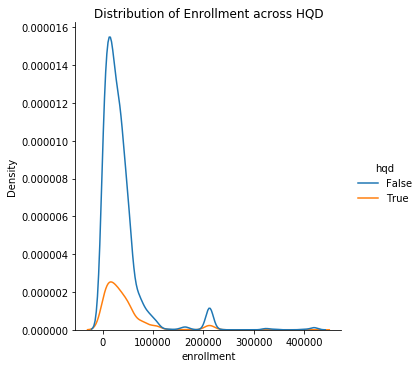

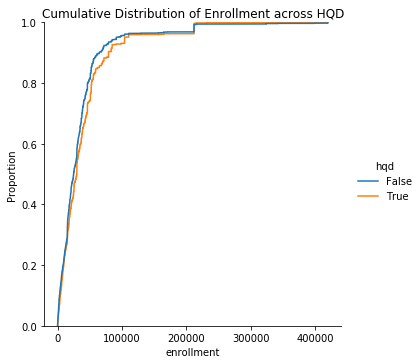

In [12]:
sns.displot(x='enrollment', hue='hqd', kind='kde', data=doc)
plt.title('Distribution of Enrollment across HQD')

sns.displot(x='enrollment', hue='hqd', kind='ecdf', data=doc)
plt.title('Cumulative Distribution of Enrollment across HQD')
plt.show()

Calculating the high quality document (HQD) rate by different categorical features to perform a barplot as following. The idea is normalized high quality document volumne by total documents to aviod population bias.

$$
HQD\ Rate = \frac{N(high-quality-documents)}{N(total-documents)}
$$

#### School Type Corhot
the `Trade` type has the highest HQD rate about 25%, and the `High` type has the lowest rate as 8%.

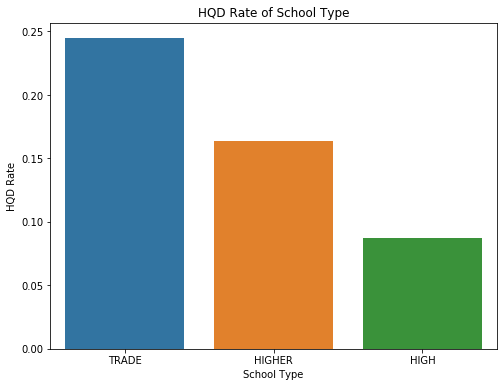

In [27]:
temp = doc.query('hqd == True').groupby(['school_type', 'hqd']).size()/doc.groupby(['school_type']).size()
temp = temp.reset_index().sort_values(0, ascending=False).head(20)

plt.figure(figsize=(8,6))
ax = sns.barplot(x='school_type', y=0, data=temp)
plt.xlabel('School Type')
plt.ylabel('HQD Rate')
plt.title('HQD Rate of School Type')
plt.show()

#### First Subject Corhot

The nursing is leading the top with 38% HQD rate, and top 5 subject categories are health science, finance, management and business.

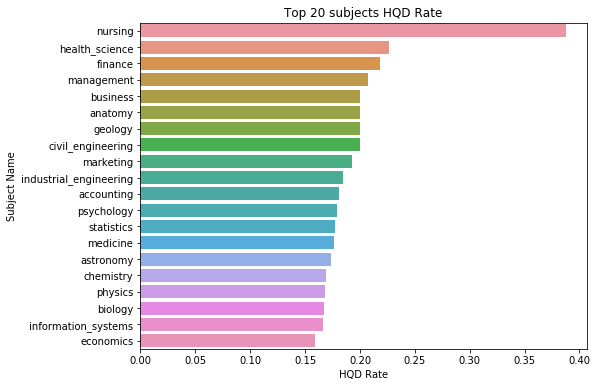

In [101]:
temp = doc.query('hqd == True').groupby(['first_subject_name']).size()/doc.groupby(['first_subject_name']).size()
temp = temp.reset_index().sort_values(0, ascending=False).head(20)

plt.figure(figsize=(8,6))
ax = sns.barplot(x=0, y='first_subject_name', data=temp)
plt.xlabel('HQD Rate')
plt.ylabel('Subject Name')
plt.title('Top 20 subjects HQD Rate')
plt.show()

#### Top Keywods Corhot

The barplot shows HQD rate with extracted top keywords is 12% higher than without keywords, so the `top keywods` is a good indicator of identifing high quality document.

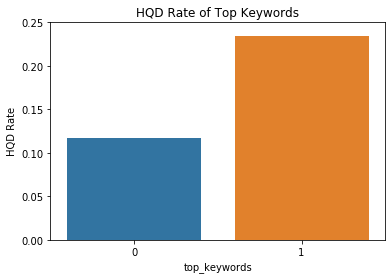

In [105]:
temp = doc.query('hqd == True').groupby(['top_keywords']).size()/doc.groupby(['top_keywords']).size()
temp = temp.reset_index().sort_values(0, ascending=False).head(20)

sns.barplot(x='top_keywords', y=0, data=temp)
plt.ylabel('HQD Rate')
plt.ylim(0, 0.25)
plt.title('HQD Rate of Top Keywords')
plt.show()

Reviewing the distribution of HQD score, it shows the correlation between document readability and high quality documents. And, I found the median score of high quality document readability is 0.95, however, it contains a lot of false positive as well.

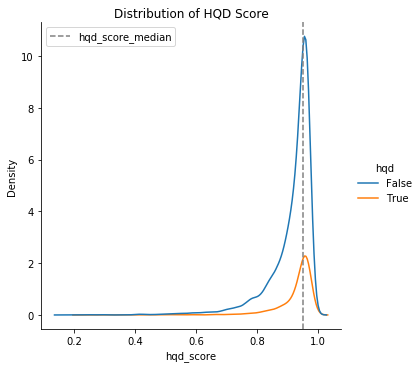

In [125]:
sns.displot(x='hqd_score', hue='hqd', kind='kde', data=doc)
plt.axvline(doc.query('hqd == True').hqd_score.median(), linestyle='--', color='gray', label='hqd_score_median')
plt.legend()
plt.title('Distribution of HQD Score')
plt.show()

### Question

Discuss your analytics plan/steps - How would you build a prediction model for high quality documents? Actual model development is not required.

1. Data Retrieval
   * collect historical data with labeled high quality documents based on current definition
   * join with other data sources might be helpful to target high quality documents: domain knowledge, feature correlation
2. Data Preprocessing
   * transform data
   * impute missing value/outliers
   * sampling method if imbalanced dataset
3. Data Split
   * construct training and test sets
   * validate the class distribution
4. Model Training
   * construct a simple baseline model (random forest)
   * feature engineering
       * one-hot-encoding/categorical embedding
       * scaling
       * time series features: spike detection, time series trend, seasonality
       * clusters: geographic, user profile
   * advanced ML model vs business needs
       * logistic regression: easy interpretation, faster training, stable, lower model complexity
       * XGBoost: well performance, longer training/tuning time, lack interpretation
       * SVM: long training time, but easy deploy the model
       * Deep Learning: black box, well performance on imbalanced data, long training time
5. Model Evaluation & Insights
   * design the evaluation metrics based on the business needs
   * select the optimal model based on evaluation metrics, comparing with the baseline model
   * report the predictions, model performance and top factors derive decision

### Bonus question

Discuss how Course Hero might leverage the insights gained from the analytics deliverable to improve?

1. build and analyze user profiles to help better understand users' preference and needs
2. recommend high quality documents to users based on their profiles to increase users' experience and business retention
3. validate/remove lower quality documents when users upload documents to reduce the website capacity and improve users' experience
4. leverage NLP technique to better understand document content in order to pre-tag and categorize documents
5. analyze/forecast churn users to reduce the churn rate and increase retention through survey and promotions